Praktikum 1 ini akan membuat JST sederhana (2 layer) dengan forward pass dan backpropagation manual.

Backpropagation adalah sebuah algoritma untuk melatih jaringan saraf tiruan dengan cara mengoreksi kesalahan. Algoritma ini bekerja dengan cara menghitung selisih antara keluaran yang dihasilkan jaringan dan keluaran yang seharusnya (kesalahan), lalu memperbarui bobot dan bias jaringan secara berulang dari keluaran ke masukan untuk meminimalkan kesalahan tersebut. Cara kerja backpropagation:

1. Perambatan maju (forward pass): Data masukan diproses melalui jaringan dari lapisan masukan ke lapisan keluaran untuk menghasilkan prediksi awal.
2. Hitung kesalahan: Selisih antara keluaran prediksi dan keluaran target dihitung menggunakan fungsi kerugian.
3. Perambatan mundur (backward pass): Kesalahan disebarkan kembali ke belakang untuk menghitung gradien dari fungsi kerugian terhadap bobot dan bias.
4. Perbarui bobot: Bobot dan bias disesuaikan menggunakan penurunan gradien.

Langkah yang akan diimplementasikan dalam notebook:
1. Buat dataset sederhana (XOR).
2. Inisialisasi bobot dan bias.
3. Forward pass contoh.
4. Hitung error dan lakukan backpropagation (training loop).
5. Update bobot menggunakan gradient descent & tampilkan hasil.

Setiap langkah dipisahkan ke dalam sel terpisah agar jelas.

In [1]:
# Step 1: Dataset XOR & parameter initialization (Python)
import numpy as np

# Dataset XOR (inputs X, targets y)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Network architecture
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1  # learning rate

# Weight & bias initialization (small random values)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Activation function (sigmoid) and its derivative

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    # Assumes x already passed through sigmoid -> uses f'(x)=f(x)*(1-f(x))
    return x * (1 - x)

print("Initialized shapes:")
print("W1", W1.shape, "b1", b1.shape, "W2", W2.shape, "b2", b2.shape)

Initialized shapes:
W1 (2, 2) b1 (1, 2) W2 (2, 1) b2 (1, 1)


In [2]:
# Step 2: Single forward pass demonstration (no training yet)
# Uses current random weights
z1 = np.dot(X, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
a2 = sigmoid(z2)

print("Hidden layer activation (a1):")
print(a1)
print("Raw output (a2):")
print(a2)

# Simple mean squared error for current predictions
mse = np.mean((y - a2) ** 2)
print("Initial MSE (untrained):", mse)

Hidden layer activation (a1):
[[0.5        0.5       ]
 [0.52974125 0.71281835]
 [0.53150403 0.25404958]
 [0.5610166  0.45809403]]
Raw output (a2):
[[0.37336028]
 [0.34780842]
 [0.39433447]
 [0.36911542]]
Initial MSE (untrained): 0.2669571709082634


In [3]:
# Step 3: Training with manual backpropagation
epochs = 5000
print_interval = 500
loss_history = []

for epoch in range(1, epochs + 1):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Error
    error = y - a2  # shape (4,1)
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)          # (4,1)
    d_W2 = np.dot(a1.T, d_a2)                      # (2,1)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)     # (1,1)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)  # (4,2)
    d_W1 = np.dot(X.T, d_a1)                             # (2,2)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)           # (1,2)

    # Gradient descent weight update
    W1 += lr * d_W1
    b1 += lr * d_b1
    W2 += lr * d_W2
    b2 += lr * d_b2

    if epoch % print_interval == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

print("Training complete.")

Epoch 500, Loss: 0.249926
Epoch 1000, Loss: 0.249561
Epoch 1500, Loss: 0.248649
Epoch 2000, Loss: 0.246193
Epoch 2500, Loss: 0.239453
Epoch 3000, Loss: 0.224465
Epoch 3500, Loss: 0.206105
Epoch 4000, Loss: 0.192933
Epoch 4500, Loss: 0.183386
Epoch 5000, Loss: 0.167496
Training complete.


In [4]:
# Step 4: Final predictions & loss summary
# Final forward pass after training
z1 = np.dot(X, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
a2 = sigmoid(z2)

print("Final predictions (a2):")
print(a2)
print("Targets (y):")
print(y)

# Simple classification threshold at 0.5
pred_classes = (a2 >= 0.5).astype(int)
print("Predicted classes:")
print(pred_classes)

final_loss = np.mean((y - a2) ** 2)
print("Final MSE loss:", final_loss)

# Show a compact loss history sample (every 500th epoch + last)
import math
sample_points = list(range(499, len(loss_history), 500))
if sample_points[-1] != len(loss_history)-1:
    sample_points.append(len(loss_history)-1)
print("Loss samples:")
for idx in sample_points:
    print(f"Epoch {idx+1}: {loss_history[idx]:.6f}")

Final predictions (a2):
[[0.36163962]
 [0.37832669]
 [0.81594669]
 [0.34444081]]
Targets (y):
[[0]
 [1]
 [1]
 [0]]
Predicted classes:
[[0]
 [0]
 [1]
 [0]]
Final MSE loss: 0.16744400185400277
Loss samples:
Epoch 500: 0.249926
Epoch 1000: 0.249561
Epoch 1500: 0.248649
Epoch 2000: 0.246193
Epoch 2500: 0.239453
Epoch 3000: 0.224465
Epoch 3500: 0.206105
Epoch 4000: 0.192933
Epoch 4500: 0.183386
Epoch 5000: 0.167496


# Tugas 1:

- Ubah jumlah neuron hidden layer menjadi 3.

- Bandingkan hasil loss dengan konfigurasi awal.

- Tambahkan fungsi aktivasi ReLU dan bandingkan hasil

Training baseline: hidden=2, activation=sigmoid
 -> Final MSE: 0.136835

Training hidden3_sigmoid: hidden=3, activation=sigmoid
 -> Final MSE: 0.136835

Training hidden3_sigmoid: hidden=3, activation=sigmoid
 -> Final MSE: 0.022405

Training hidden3_relu: hidden=3, activation=relu
 -> Final MSE: 0.022405

Training hidden3_relu: hidden=3, activation=relu
 -> Final MSE: 0.001335

Summary of experiments (MSE):
baseline        MSE = 0.136835
hidden3_sigmoid MSE = 0.022405
hidden3_relu    MSE = 0.001335
 -> Final MSE: 0.001335

Summary of experiments (MSE):
baseline        MSE = 0.136835
hidden3_sigmoid MSE = 0.022405
hidden3_relu    MSE = 0.001335


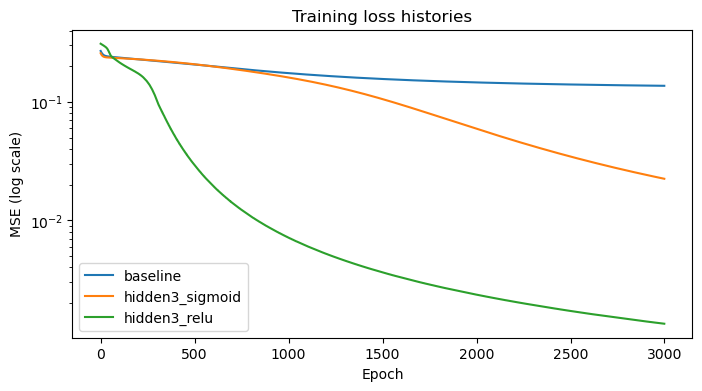

In [1]:
# Tugas 1 - Eksperimen: Ubah hidden neurons jadi 3 dan bandingkan aktivasi Sigmoid vs ReLU
import numpy as np
import matplotlib.pyplot as plt

# Recreate XOR dataset (safe if previous cells not run)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Activation helpers
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(a):
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(a):
    return (a > 0).astype(float)

# Training function (manual backprop) to run experiments reproducibly
def train_xor(hidden_size, activation='sigmoid', epochs=5000, lr=0.1, verbose=False):
    np.random.seed(0)
    # Initialize weights
    W1 = np.random.randn(2, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, 1)
    b2 = np.zeros((1, 1))

    loss_history = []

    for epoch in range(1, epochs+1):
        # Forward
        z1 = np.dot(X, W1) + b1
        if activation == 'sigmoid':
            a1 = sigmoid(z1)
        else:
            a1 = relu(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)  # output always sigmoid for binary

        # Error
        error = y - a2
        loss = np.mean(error**2)
        loss_history.append(loss)

        # Backprop
        d_a2 = error * sigmoid_derivative(a2)  # (4,1)
        d_W2 = np.dot(a1.T, d_a2)
        d_b2 = np.sum(d_a2, axis=0, keepdims=True)

        if activation == 'sigmoid':
            d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
        else:
            d_a1 = np.dot(d_a2, W2.T) * relu_derivative(a1)

        d_W1 = np.dot(X.T, d_a1)
        d_b1 = np.sum(d_a1, axis=0, keepdims=True)

        # Update (note: earlier code used += lr * grad; keeping same sign to reproduce behavior)
        W1 += lr * d_W1
        b1 += lr * d_b1
        W2 += lr * d_W2
        b2 += lr * d_b2

        if verbose and (epoch % (epochs//5) == 0 or epoch==1):
            print(f"Epoch {epoch}, loss={loss:.6f}")

    # Final forward
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1) if activation=='sigmoid' else relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    final_loss = np.mean((y - a2)**2)

    return final_loss, loss_history, a2

# Run three experiments: baseline (hidden=2, sigmoid), hidden=3 sigmoid, hidden=3 relu
configs = [
    ('baseline', 2, 'sigmoid'),
    ('hidden3_sigmoid', 3, 'sigmoid'),
    ('hidden3_relu', 3, 'relu')
]
results = {}
for name, hsize, act in configs:
    print(f"Training {name}: hidden={hsize}, activation={act}")
    final_loss, loss_hist, preds = train_xor(hsize, activation=act, epochs=3000, lr=0.1, verbose=False)
    results[name] = {'loss': final_loss, 'history': loss_hist, 'preds': preds}
    print(f" -> Final MSE: {final_loss:.6f}\n")

# Summary
print("Summary of experiments (MSE):")
for name in results:
    print(f"{name:15s} MSE = {results[name]['loss']:.6f}")

# Plot loss histories
plt.figure(figsize=(8,4))
for name in results:
    plt.plot(results[name]['history'], label=name)
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('MSE (log scale)')
plt.legend()
plt.title('Training loss histories')
plt.show()
